# Automatidata project - A/B Testing


I assume the role of a data professional in a data consulting firm, called **Automatidata**. The current project for their newest client, the New York City Taxi & Limousine Commission (New York City TLC) is reaching its midpoint, having completed a project proposal, Python coding work, and exploratory data analysis.

I received a new email from Uli King, Automatidata’s project manager. Uli tells my team about a new request from the New York City TLC: to analyze the relationship between **fare amount** and **payment type**. I also discover follow-up emails from three other team members: Deshawn Washington, Luana Rodriguez, and Udo Bankole. These emails discuss the details of the analysis. 
A final email from Luana includes my specific assignment: to conduct an A/B test. 


**The purpose** of this project is to demostrate knowledge of how to prepare, create, and analyze A/B tests. Our A/B test results aims to find ways to generate more revenue for taxi cab drivers.

**Note:** For the purpose of this exercise, it is assumed that the sample data comes from an experiment in which customers are randomly selected and divided into two groups: 
1) customers who are required to pay with credit card, 
2) customers who are required to pay with cash. 

Without this assumption, we cannot draw causal conclusions about how payment method affects fare amount.

**The goal:** The goal for this A/B test is to sample data and analyze whether there is a relationship between **payment type** and **fare amount**. For example: discover if customers who use credit cards pay higher fare amounts than customers who use cash.
  
*This activity has four parts:*

**Part 1:** Imports and data loading
* What data packages will be necessary for hypothesis testing?

**Part 2:** Conduct EDA and hypothesis testing

**Part 3:** Communicate insights with stakeholders

* What key business insight(s) emerged from our A/B test?

* What business recommendations can be propose based on the results?

# **Conducting an A/B test**

### Task 1. Imports and data loading

Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

**Load in the dataset**

In [16]:
taxi_data = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv", index_col= 0)
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [18]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null  float64
 1

### Task 2. Data exploration



**Note:** In the dataset, `payment_type` is encoded in integers:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown



In [19]:
# descriptive stats code for EDA
taxi_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


The `fare amount` appears to be quite skewed with the maximum being **$999** and the median beign just **$9.5**. I assume that there are outliers in this variable.

Up next is to explore the `fare_amount` by `payment_type`.

In [28]:
taxi_data['payment_type'].unique()

array([1, 2, 3, 4], dtype=int64)

In [ ]:
new_data = taxi_data[(taxi_data['payment_type']== 1) | (taxi_data['payment_type']== 2)]

We are interested in the relationship between payment type and the fare amount the customer pays. One approach is to look at the average fare amount for each payment type. 

Payment_type 1 are Customers who pay with credit card

Payment_type 2 are Customers who pay with cash


In [30]:
new_data.groupby('payment_type')['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
Name: fare_amount, dtype: float64

Based on the averages shown, it appears that customers who pay in **credit card** tend to pay a larger fare amount than customers who pay in **cash**. 

However, this difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is statistically significant, we will conduct a hypothesis test.

In [68]:
# Let's create 2 independent samples for fare amounts for credit card and cash spenders.
credit_card = new_data[new_data['payment_type'] == 1]['fare_amount']
cash = new_data[new_data['payment_type'] == 2]['fare_amount']

I am curious to know what the variation or distribution of the samples are. 
Let's create box plots and histograms for both samples.

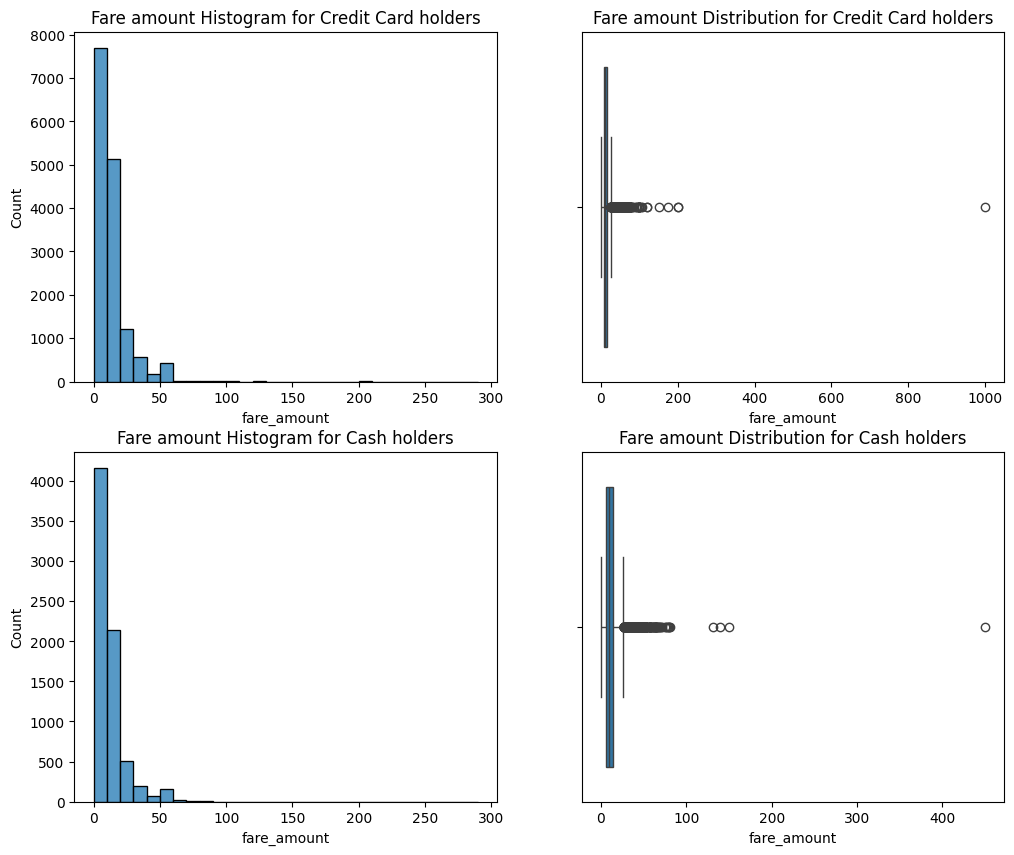

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize= (12,10))
axes[0,0].set_title('Fare amount Histogram for Credit Card holders')
sns.histplot(credit_card, bins= range(0, 300, 10), ax=axes[0,0])

axes[1,0].set_title('Fare amount Histogram for Cash holders')
sns.histplot(cash, bins= range(0, 300, 10), ax=axes[1,0])

axes[0,1].set_title('Fare amount Distribution for Credit Card holders')
sns.boxplot(x=credit_card, ax=axes[0,1])

axes[1,1].set_title('Fare amount Distribution for Cash holders')
sns.boxplot(x=cash, ax=axes[1,1]);

From above, both samples have similar distributions and both have obvious outliers. 


## Task 3. Hypothesis testing




The goal in this step is to conduct a two-sample t-test. Let's recall the steps for conducting a hypothesis test: 

1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis 



$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

### Checking Assumptions for Independent T-Test
Here are theassumptions that must be checked in order to perform this statistical test:
1. **Independence of Observation:** This assumption is checked as there are no duplicates in this dataset. This means no one customer paid with credit card and cash at the same time.
2. **Normality Assumption:** The sample data must be normally distributed. We will check that soon.
3. **Homogeniety of variance:** Both samplesmust have equal variation. That is, the STD for instance should be similar.


#### Checking for Normality of the samples:
I will check  this  with  the Q-Q  Plot method

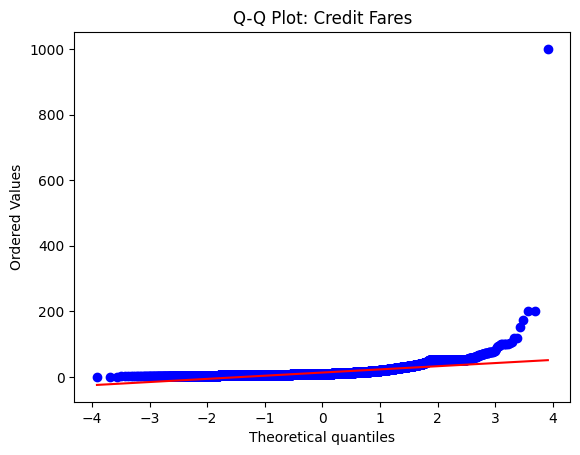

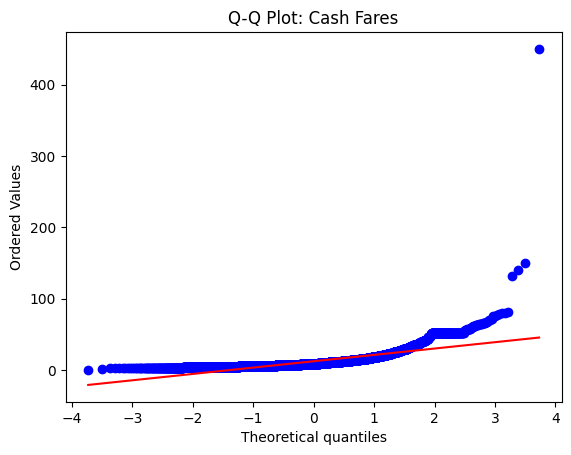

In [72]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(credit_card, dist="norm", plot=plt)
plt.title("Q-Q Plot: Credit Fares")
plt.show()

stats.probplot(cash, dist="norm", plot=plt)
plt.title("Q-Q Plot: Cash Fares")
plt.show()


From above, both samples are not normally distributed as they deviate from the  QQ plot. 

However, When the normality assumption is violated in an independent t-test, the validity of the test depends on the sample size and the severity of the non-normality.

First, I will confirm again the sample size of both groups:

In [73]:
taxi_data['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

From above, the sample size of Credit_Card group is **15,265** and Cash group is **7,267**, both of which are above 30.

For Large samples where n ≥ 30 per group,
The Central Limit Theorem (CLT) ensures the sampling distribution of the mean becomes approximately normal, even if the raw data is non-normal. 
Therefore, we can go ahead with the Independent T-test.

#### Checking for Homogeneity of Variance:


In [74]:
# Test for equality of variance using levene test
from scipy.stats import levene

stat, p = levene(credit_card, cash)
print("Levene's Test: Statistics=%.3f, p=%.3f" % (stat, p))

# If p-values is greater than 0.05, then both samples have equal variance, otherwise, they do not.

Levene's Test: Statistics=9.681, p=0.002


Since the P-value is way less than 0.05, there is enough evidence to reject the null hypothesis of the levene test and conclude that homogeneity of variance has been violated.

I will therefore proceed to use the **Welch test** instead.

We choose 5% as the significance level and proceed with a two-sample t-test (Welch test)

In [50]:
t_stat, pvalue = stats.ttest_ind(credit_card, cash, equal_var= False) #welch test
print('T-Stat:', t_stat)
print('P-Value;', pvalue)

T-Stat: 6.866800855655372
P-Value; 6.797387473030518e-12


Since the p-value is significantly smaller than the significance level of 5%, we reject the null hypothesis. 

*Notice the 'e-12' at the end of the pvalue result.*

we conclude that there is a statistically significant difference in the average fare amount between customers who use credit cards and customers who use cash.

### Task 4. Communicate insights with stakeholders

**In Conclusion:**
1.   The key business insight is that encouraging customers to pay with credit cards can generate more revenue for taxi cab drivers. 

2.   This project requires an assumption that passengers were forced to pay one way or the other, and that once informed of this requirement, they always complied with it. 

        The data was not collected this way; so, an assumption had to be made to randomly group data entries to perform an A/B test. This dataset does not account for other likely explanations. 


        For example, riders might not carry lots of cash, so it's easier to pay for longer/farther trips with a credit card. In other words, it's far more likely that fare amount determines payment type, rather than vice versa. 